# 4. Labor: Polinomiális Logisztikus regresszió Regularizációval

A gyakorlat során megvizsgáljuk hogyan tudunk nem lineárisan elhatárolt csoportok közötti kalsszifikációt elvégezni a polynomiális regressziós segítségével, illetve hogyan tudjuk a modellünk súlyait kézben tartani az L1 és L2 regularizáció segítsévél.

### Születés utáni komplikáció

A gyakorlathoz tartozó adatsor 1000+ születés esetén tartalmazza a terhesség teljes hosszát napokban, illetve a születéskori testsúlyt kilogrammban. A célunk az lesz, hogy modellezzük ezek alapján mekkora az esély arra, hogy a baba fejlődésének korai szakaszában komplikációk lépnek fel.

## Alultanulás (underfitting)

Az előző gyakorlat során alkalmazott Logisztikus regresszió alapjául egy lineáris modellt használtunk. Bár a teljes modellt nevezhetjük nem linárisnak a _sigmoid_ függvény bevezetése miatt, a meghatározott döntési határ (_decision boundary_) a lineáris alap miatt egy egyenes volt. Bár ezzel viszonylag jól tudtuk modellezni az eredményeket, látható volt, hogy egy megfelelő görbe jobb eredményeket tudott volna adni. Hasonló megfontolásokat tehetünk egy szimpla regressziós feladat esetében is.


<center><img src="img/linear_vs_poly.svg" width="1200"></center>
<!--<center><img src="https://drive.google.com/uc?export=view&id=1RoiKcoYZ9CM5XODbPFp30oY74le1LDy8" width="1200"></center>-->

Amennyiben a modellünk nem elég komplex, hogy az adatok által leírt összefüggéseket modellezze, a kapott végeredmény a valóság egy leegyszerűsített, nem olyan pontos modellje lesz (lineáris döntési határ görbe helyett), a modellünk alultanult. A felhasználásunktól függően ez lehet, hogy megfelel a célnak, de lesznek olyan esetek, amikor szükségünk lesz a bonyolultabb modell bevezetésére.

## Polinomiális regresszió

Ahhoz hogy a modellünk képes legyen görbe jellegű döntéshatárokat meghatározni, az alapul szolgáló lineáris illesztés helyett magasabb rendű, u.n. polinomiális regressziót kell alkalmaznunk.

Lineáris regresszió két változóra:
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$$

Polinomiális regresszió két változóra harmadrendű polinommal:
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_1 x_2 + w_5 x_2 ^2 + w_6 x_1^3 + w_7 x_1^2 x_2 + w_8 x_1 x_2^2 + w_9 x_2^3$$

A modellillesztés szempontjából azonban tekinthetünk a bemenetek magasabb rendű kombinációjára úgy, mintha új, független változók lennének:
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 +\dots + w_9 x_9$$
ahol
$$x_3 = x_1^2; \quad x_4 = x_1 x_2; \quad x_5 = x_2^2; \quad x_6 = x_1^3; \quad x_7 = x_1^2 x_2; \quad x_8 = x_1 x_2^2; \quad x_9 = x_2^3$$

Az új változók definiálásával egy kétváltozós harmadrendű modell illesztésének folyamata teljesen megegyezik egy kilenc változós ténylegesen lineáris regresszió illesztésével, az eltérés csupán az értelmezésben van. A bemeneti adatpontokat 2D-ben tudjuk ábrázolni, nem kell 9 különböző dimenziót használni, az illesztett modellt pedig értelmezhető egy két változó feletti harmadrendű polinomként egy 9 dimenziós síkfelület helyett.

## Túltanulás (overfitting)

A bonyolultabb modell bevezetésével megjelenik annak a veszélye, hogy a modell túltanul, az adatok mögötti összefüggés helyett a konkrét adatpontokat tanulja meg. Így a tanítóadatokon való értékelés esetén azt látjuk, hogy nagyon jól teljesít a modell, azonban további, a tanításhoz nem használt adatokon szignifikánsan rosszabb a teljesítménye, elveszíti az általánosító képességét. A gépi tanulással megoldott problémák során cél mindig a bemenetek és kimenetek közötti összefüggés betanítása, nem a konkrét adatpontok megtanulása. Bár a polinomiális logisztikus regresszió nem valószínű, hogy az ábrán látható mérétkben túltanulást fog mutatni, bonyolultabb, több nemlinearitást tartalmazó modellek (neurális hálók) esetében ez egy valós probléma lehet.

<center><img src="img/overfit.svg" width="1200"></center>
<!--<center><img src="https://drive.google.com/uc?export=view&id=1_q4JQ7N0uL8AdBIiT11K8ConQykic7co" width="1200"></center>-->


## Regularizáció

Az eddigiekben a költségfüggvényt egy szempont alapján határoztuk meg: a modellünk a lehető legpontosabban kövesse az illesztésre használt adatokat. Azonban lehetőségünk van a költségfüggvényben a pontos illesztés mellett más szempontokat is figyelembe vennünk, amivel a végleges súlyok jellegét befolyásolhatjuk. Ezt a módszert **regularizációnak** nevezzük. A regularizáció használatakor a modell illesztésének jóságát mérő tag mellett egy regularizációs, vagyis büntető (_penalty_) taggal egészítjük ki a teljes költségfüggvényt. Egy két osztályból álló klasszifikáció esetén a költségfüggvény általános alakja:
$$C(\mathbf{W}) = C_{BCE}(\mathbf{W}) + \lambda P(\mathbf{W})$$
ahol $C_{BCE}(w)$ a már előző gyakorlatról ismert Binary CrossEntropy költségfüggvény, $P(\mathbf{W})$ a regularizációból származó büntető tag, $\lambda$ pedig a büntető tag súlyozására használt paraméter.

A költségfüggvény változásával a tanulás során használt gradiensvektor is változik.  Az összegfüggvény deriválási szabálya alapján
$$\nabla C (\mathbf{W}) = \nabla C_{BCE}(\mathbf{W}) + \lambda \nabla P(\mathbf{W})$$
Így a regularizáció hasnzálatakor nincs más teendő, mint az eddigiekben számolt gradiens mellé a megfelelő büntető tag gradiensét hozzáadni, illetve a büntetés mértékét a $\lambda$ paraméter segítségével beállítani. 

Az egyes regularizációs módszerek segítenek a modell túltanulását elkerülni, a modelleket a lehető legegyszerűbb vagy legáltalánosabb forma felé irányítani. A bias taghoz tartozó súlyt a feladattól függően nem mindig vetjük alá regularizációnak. A gyakorlat során kétféle regularizációs módszert nézünk meg.

### L1 regularizáció (Lasso regularizáció)

L1 regularizáció esetén a büntető tag a súlyok abszolút értékének összege:
$$P_{L1}(\mathbf{W}) = \sum_{i=1}^n |w_i|$$

A Lasso regularizáció így arra törekszik, hogy jó modellillesztés mellett a súlyok egyenként a lehető legkisebbek legyenek. Azok a súlyok, amelyek csak kis mértékben járulnak hozzá a modell jóságához a nullához fognak közelíteni. Az L1 regularizáció segíségével így a modell dimenziója 'csökkenthető', a nem releváns bemeneti paraméterek a meghatározott közel zérus súlyok alapján elhagyhatók. A végső illesztés esetében csak azok a súlyok maradnak fenn, amelyek szignifikánsan hozzájárulnak a kimenő változó magyarázásához. A modellünket így egyszerűsíthetjük, a modellillesztés mellet dimenzióredukciót is végzünk.

Az L1 regularizáció esetén a gradiensvektor kiegészítő tagja az egyes súlyok szignuma:
$$ \nabla P_{L1}(\mathbf{W}) = sgn(\mathbf{W})$$
Ez alapján könnyen látható, hogy minden súlyt azok nagyságától függetlenül a 0 felé igyekszik eltolni.

### L2 regularizáció (Ridge regularizáció)

L1 regularizáció esetén a büntető tag a súlyok négyzetének összege (az $\frac{1}{2}$-es szorzó csak a szebb gradiens céljából van jelen):
$$ P_{L2}(\mathbf{W}) = \frac{1}{2}\sum_{i=1}^n w_i^2 $$

A Ridge regularizáció így arra törekszik, hogy jó modellillesztés mellett kerülje a nagy súlyok használatát. A négyzetre emelés miatt a kissebb közeli súlyokat nem bünteti annyira, a nagyobb súlyokat viszont jelentősen jobban bünteti mint az L1 regularizáció. Az optimlizáció igy igyekszik eggyik bemenetre sem túlságosan támaszkodni. Ezzel növelhető a modell robosztussága és általánosító képessége.

Az L2 regularizáció esetén a gradiensvektor keigészítő tagjai maguk a súlyok:
$$ \nabla P_{L2}(\mathbf{W}) = \mathbf{W}$$
Látható, hogy ebben az esetben a regularizáció a súly nagyságával arányosan bünteti azt, azaz a nagyobb súlyra nagyobb a büntetés, kis súly esetén azonban nem szignifikáns. Az együttes hatás így, hogy minden súlyt igyekszik kis értéken tartani.

## 00: Könyvtár importálások

Első lépésként importáljuk a feladat megoldása során használt könyvtárakat. Esetünkben ezek a következők lesznek:
- Numpy a matematikia műveletek elvégzéséhez
- Pandas az adatok beolvasásához és kezeléséhez
- MatPlotLib.pyplot az eredményeink ábrázolásához
- Plotly Express interaktív vizualizációhoz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Használjuk ezeket sötét téma esetén
plt.style.use('dark_background')
styleTemplate = 'plotly_dark'

# Használjuk ezeket világos téma esetén
#plt.style.use('default')
#styleTemplate = 'plotly_white'

## 01: Adatbeolvasás
Olvassuk be a szükséges adatokat az ```birthData.txt``` fájlból.

In [4]:
df = pd.read_csv('birthData.txt', sep = ',', header = 0)    # Olvassuk be az adatokat egy Pandas DataFrame ojektumba
df.head(10)                                                 # Irassuk ki az első 10 sort, hogy ellenőrizzük sikerült-e a beolvasás

,gestation,birthweight,complication
0,283,3.883884,0
1,248,4.082331,0
2,275,3.175146,0
3,270,1.563774,1
4,251,3.968933,0
5,283,3.061748,0
6,283,3.628739,0
7,278,3.260195,0
8,281,3.997282,0
9,273,2.920001,0


## 02: Adatfelfedezés

Új adthalmazzal történő első interrakció során érdemes azt először megvizsgálni, alapvető vizualizációkat ábrázolni, hogy legyen egy elsődleges "benyomás" az adatok jellegéről. Ábrázoljuk az adatokat egy X-Y diagrammon.

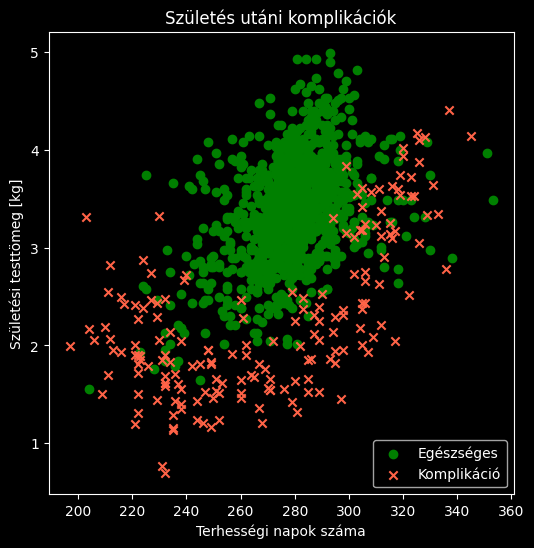

In [5]:
# Formális vizualizáció MatPlotLib-el
plt.figure(figsize=(6, 6))

plt.scatter(df[df['complication'] == 0]['gestation'], df[df['complication'] == 0]['birthweight'], marker='o',c="green", label="Egészséges")
plt.scatter(df[df['complication'] == 1]['gestation'], df[df['complication'] == 1]['birthweight'], marker='x',c="tomato", label="Komplikáció")

plt.title("Születés utáni komplikációk")
plt.xlabel("Terhességi napok száma")
plt.ylabel("Születési testtömeg [kg]")
plt.legend(loc='lower right')

plt.show()

Ez alapján látható, hogy igen nehéz lenne egy egyenes segítségével egy jó határvonalat illeszteni az adatokra, mindenképpen magasabb rendű modellt kell alkalmaznunk.

## 03: Adatok előkészítése

A beolvasott pandas adattáblából a tanító bementeket és kimeneteket mátrixokba rendezzük.

In [6]:
X = df[['gestation', 'birthweight']].to_numpy()   # Bemeneti változók oszlopainak kiemelése és tömmbé konvertálása
Y = df[['complication']].to_numpy()               # Kimeneti változó oszlopának kiemelése és tömmbé konvertálása

m,n = X.shape   
print('X:',X.shape)                               # adattömbök méretének / adatok számának kiírása
print('Y:',Y.shape)
print('Adatok száma',m)
print('Változók (Feature) száma:',n)

X: (1350, 2)
Y: (1350, 1)
Adatok száma 1350
Változók (Feature) száma: 2


A polinomiális regresszió alkalmazásához a bementi adatmátrixunkat ki kell egészítenünk az adatok magasabb rendű kombinációival. Harmadrendű polinom esetén:
$$x_1,\  x_2 \Rightarrow\ 1,\ x_1,\ x_2,\ x_1^2,\ x_1x_2,\ x_2^2,\ x_1^3,\ x_1^2x_2,\ x_1x_2^2,\ x_2^3$$

**Feladat:** implementálja a ```mapFeatures()``` függvényt, amely a **két** bemeneti változó alapján legenerálja a teljes bementei mátrixot tetszőleges fokszám esetére!

In [7]:
def mapFeatures(X, deg = 3):                         
# Bemeneti változók létrehozása polinomiális regresszióhoz
#######################################################
  if X.shape[1] == 2:
    features = []
    x1 = X [:,0:1] # az indexelés azért így, hogy mátrixok legyenek
    x2 = X [:,1:]

    for i in range(deg+1):
      for pow in range(i+1):
        features += [x1**(i-pow) * x2**pow]
      out = np.hstack(features)
  else:
    raise ValueError("Az X bemenet nem 2 változós!")
  
#######################################################            
  return out

In [8]:
deg = 5                     # ötödrendű  polinom alkalmazása
X=mapFeatures(X, deg)        # vátozók kibővítése 
if X.shape[1] != 21:        # ellenőrzés
    print("Az X mátrixban található változók száma nem megfelelő. Ellenőrizze a featureNormalise() függvény implementációját!")
else:
    print(X.shape)

(1350, 21)


Az újonnan előállított bemeneti adatokat természetesen normalizálnunk is kell (a bias változót leszámítva). Fontos, hogy ezt a kibővítés után tegyük meg. Ha először normalizálunk és aztán bővítünk, még mindig kaphatunk jelentősen eltérő angyságrendbe eső adatkat a bővítésénl alkalmazott magasabb hatványok miatt.

In [9]:
def featureNormalize(Z): 
    mean = np.mean(Z, axis = 0)
    mean[0] = 0     #azért, hogy az 1-es oszlopot ne változtassa meg
    sigma = np.std(Z, axis = 0)
    sigma[0] = 1    #azért, hogy az 1-es oszlopot ne változtassa meg
    Z_norm = (Z-mean)/sigma
    return Z_norm, mean, sigma                            

print('Bementei adatok normalizálása ... \n')                    
X,Xmean,Xsigma = featureNormalize(X)                      # X standardizálása
scaleFactors = {"Xmean" : Xmean, "Xsigma" : Xsigma}
print('Átlagos terhességhossz és születési testtömeg:', Xmean[1:3])
print('Terhességhossz és születési testtömeg szórása:', Xsigma[1:3], '\n')

Bementei adatok normalizálása ... 

Átlagos terhességhossz és születési testtömeg: [277.92962963   3.24107755]
Terhességhossz és születési testtömeg szórása: [20.18052444  0.67791765] 



## 04: Modell definiálása

Az adatok előkészítése utáni következő lépés a modell és tanítási logika definiálása.

In [10]:
# Szigmoid aktivációs függvény
def sigmoid(z):              
    return 1/(1+np.exp(-z))                              

Bár a regularizáció miatt eltérő a tényleges költségfüggvény ami minimalizálásra kerül, a különböző illesztések összehasonlíthatóságának érdekében a modell értékelésére az eredeti **BCE** költségfüggvényt használjuk. Így a tanítás során a költségfüggvény alakulása a tényleges illesztés jóságát fogja visszaadni a modellek értékelésére.

In [11]:
# Költségfüggvény
def costBCE(X,Y,W):
   eps = 1e-15    
   yHat = sigmoid(X@W)
   m = Y.shape[0]
   C = np.mean((-Y*np.log(yHat+eps))-(1-Y)*np.log(1-yHat+eps))
   return C

A gradiensvektor számolása esetén azonban már figyelembe kell vennünk a regularizációt.

**Feladat:** implementálja a gradiensvektor számítását, amely a 'regu' pareméter értékétől függően (```'None', 'L1', 'L2'```) a megfelelő gradiensvektorral tér vissza!

In [12]:
# Gradiensvektor
def findGradient(X,Y,W, lmbd, regu):    
#######################################################   
  m = X.shape[0]
  grad = 1/m * X.T@(sigmoid(X@W)-Y)

  regu_options = {'None': 0, 'L1': 1, 'L2': 2 }
  i = regu_options.get(regu)

  d_regu = [0, np.sign(W), W]
  d_regu[0,1:2] = 0
  grad = grad + lmbd * d_regu[i]
  
#######################################################
  return grad

In [13]:
# Regularizált gradiensek tesztelése
print('''Az modell első három súlyára (bias, X1, X2) vonatkozó gradiensek 
elvárt értékei regularizáció nélkül, illetve L1 és L2 regularizáció mellett:
[[0.68212698]
 [0.13627374]
 [0.16772988]]
[[ 0.68212698]
 [ 1.13627374]
 [-0.83227012]]
[[ 0.68212698]
 [ 1.01057374]
 [-0.45577012]]''')
print()
print('''Ugyanezen esetekre a számolt gradiens:''')
W = np.array([[1.645], [0.8743], [-0.6235]])
print(findGradient(X[:,:3], Y, W, lmbd = 1, regu='None'))
print(findGradient(X[:,:3], Y, W, lmbd = 1, regu='L1'))
print(findGradient(X[:,:3], Y, W, lmbd = 1, regu='L2'))

Az modell első három súlyára (bias, X1, X2) vonatkozó gradiensek 
elvárt értékei regularizáció nélkül, illetve L1 és L2 regularizáció mellett:
[[0.68212698]
 [0.13627374]
 [0.16772988]]
[[ 0.68212698]
 [ 1.13627374]
 [-0.83227012]]
[[ 0.68212698]
 [ 1.01057374]
 [-0.45577012]]

Ugyanezen esetekre a számolt gradiens:


TypeError: list indices must be integers or slices, not tuple

A regularizált polinomiális logisztikus regresszió implementálásának utolsó eleme az iterciós logika implementálása a megflelő regularizációt tartalamazó gradinesekkel.

**Feladat:** Készítse el a regularizált logisztikus regresszió problémájat gradiens módszerrel megoldó algoritmust! Az algoritmus számolja ki a kezdeti, majd minden iteráció utáni költéségfüggvény értéket is!

In [ ]:
def logisticGradientDescent(X, Y, W, learning_rate, epochs, lmbd, regu = 'None'):
    C_history = np.zeros(epochs+1)
    C_history[0] = costBCE(X,Y,W)
######################################################
    
    for i in range(epochs):
        grad = 1/m*np.transpose(X)@(sigmoid(X@W)-Y)
        W = W-learning_rate*grad
        C_history[i+1] = costBCE(X,Y,W)
    
    
######################################################
    return W,C_history

A modell viselkedésének elemzéséhez futtassuk le a tanítást azonos paraméterek mellett mindhárom regularizációs módszerrel:

In [ ]:
print('Gradiens algoritmus futtatása ...')
epochs = 250           # epoch szám
lmbd = 0.02             # Lambda (regularizáció súlya)
learning_rate = 0.5     # tanulási ráta
W = np.zeros([X.shape[1],1])  # kezdeti zérus súlyok (0;0;0)

W_n, C_history_n = logisticGradientDescent(X, Y, W, learning_rate, epochs, lmbd, 'None')                             
plt.plot(range(C_history_n.size), C_history_n, label= "No regularization", c="red")
                                                       
W_L1, C_history_L1 = logisticGradientDescent(X, Y, W, learning_rate, epochs, lmbd, 'L1')                             
plt.plot(range(C_history_L1.size), C_history_L1, label= "L1 regularization", c="green")

W_L2, C_history_L2 = logisticGradientDescent(X, Y, W, learning_rate, epochs, lmbd, 'L2')
plt.plot(range(C_history_L2.size), C_history_L2, label= "L2 regularization", c="blue")              

plt.title("Különböző regularizációk hatása a költségre")
plt.xlabel("Iteráció")
plt.ylabel("BCE költség")
plt.legend()
plt.show()

Az modellünk alkalmazhatóságához és az illesztés vizsgálatához szükségünk lesz a predict függvényre, amely adott valós bemenetre (terhesség hossza napokban és újszülött súlya kilogrammban) visszatér a komplikáció valószínűségével.

**Feladat**: implementálja a predict függvényt a regularizált polinomiális logisztikus regresszió esetére! Ügyeljen rá, hogy a bemeneteket most is ki kell bővíteni és normalizálni, miellőtt a valószínűség becsülhető.

In [ ]:
def predict(X, W, deg, scaleFactors):              # predikciós függvény
###########################################    
   
   

   
   
###########################################    
   return prob, pred                                    

testScore = np.array([312,3.176])
prob, pred = predict(testScore, W_n, deg, scaleFactors)            # 312 nap terhesség után 3,176 kg-al született baba komplikációs valőszínűsége
print('''A [312 , 3.176] teszteredményekre elvárt kimenet:
Nincs komplikáció (0), p = 0.232 valószínűséggel
Számított: %.0f; %.4f valószínűséggel''' % (pred, prob))

In [ ]:
# Formális vizualizáció MatPlotLib-el
plt.figure(figsize=(6, 6))

# Eredeti adatpontok ábrázolása
plt.scatter(df[df['complication'] == 0]['gestation'], df[df['complication'] == 0]['birthweight'], marker='o',c="green", label="Egészséges")
plt.scatter(df[df['complication'] == 1]['gestation'], df[df['complication'] == 1]['birthweight'], marker='x',c="tomato", label="Komplikáció")

x1 = np.linspace(min(df['gestation'])-50, max(df['gestation']+10), 200)          # grid létrehozása
x2 = np.linspace(min(df['birthweight'])-0.2, max(df['birthweight']+1.2), 200)    # második paraméter

z_n=np.zeros((len(x1),len(x2)))                          # eredményváltozó 1 inicializálása
z_L1=np.zeros((len(x1),len(x2)))                         # eredményváltozó 2  inicializálása
z_L2=np.zeros((len(x1),len(x2)))                         # eredményváltozó 3  inicializálása

for i in range(len(x1)):                                 # valószínűség számolása a teljes háló felett
    for j in range(len(x2)):     
        testPoint = np.array([x1[i], x2[j]])
        z_n[i,j], _ = predict(testPoint, W_n, deg, scaleFactors)
        z_L1[i,j], _ = predict(testPoint, W_L1, deg, scaleFactors)
        z_L2[i,j], _ = predict(testPoint, W_L2, deg, scaleFactors)

plt.contour(x1, x2,z_n.transpose(), 0, colors='red')                                  # kirajzoljuk contour plottal a döntési határt
plt.contour(x1, x2, z_L1.transpose(), 0, colors='green')                                  # kirajzoljuk contour plottal a döntési határt
plt.contour(x1, x2, z_L2.transpose(), 0, colors='blue')                                  # kirajzoljuk contour plottal a döntési határt

plt.title("Születés utáni komplikációk")
plt.xlabel("Terhesség napjainak száma")
plt.ylabel("Születési testtömeg [kg]")
plt.legend(loc='lower right')

plt.show()

A modell viselkedésének teljes megértése érdekében érdemes nem csak a döntési határt, hanem a teljes illesztett felületet is ábrázolnunk. A `z` paraméter változtatásával kiválaszthatjuk melyik modellt ábrázoljuk, így jobban megérthetjük a költségfüggvény alakulását is.

In [ ]:
# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót transzponálni kell a helyes megjelenítésért.
fig.add_trace(go.Scatter3d(x=df['gestation'], y=df['birthweight'], z=df['complication'], mode= "markers"))
fig.add_trace(go.Surface(x=x1, y=x2, z=z_n.T, colorscale ='Blues'))

#Plot formázása
fig.update_layout(
    title = "Felvétel esélyének becslése",
    scene = dict(
        xaxis_title = "Terhesség napjainak száma",
        yaxis_title = "Születési testtömeg [kg]",
        zaxis_title = "Komplikáció valószínűsége"),
    template=styleTemplate,
    width=750,
    height=500,
)

#Plot megjelenítése
fig.show()

Az egyes regularizációs módszerek vizsgálatához nézzük meg, hogy a súlyok hogyan alakulnak az egyes módszerekkel:

In [ ]:
print('''A modell végső súlyai regularizáció nélkül''')
for (loc, value) in enumerate(W_n):
    if value <0.1:
        W_n[loc] = 0.0
print(W_n)
print()

print('''A modell végső súlyai L1 regularizációval''')
for (loc, value) in enumerate(W_L1):
    if value <0.1:
        W_L1[loc] = 0.0
print(W_L1)
print()

print('''A modell végső súlyai L2 regularizációval''')
for (loc, value) in enumerate(W_L2):
    if value <0.1:
        W_L2[loc] = 0.0
print(W_L2)